# TITANIC SURVIVAL PREDICTION

by Nadia Chusnul I

## LOAD PACKAGE

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import numpy and pandas for data manipulating and data analysis
import pandas as pd
import numpy as np

# import matplotlib and seaborn for plotting
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import scikit learn for modelling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#scikit learn for model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, auc, roc_curve

# scikit learn for categorical variables
from sklearn.preprocessing import LabelEncoder

# scikit learn for scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# file system management
import os

In [3]:
# Set pandas display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
# Set plot style and size for better visualization
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='seismic',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})

In [5]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/tested.csv')

Mounted at /content/drive


## DATA UNDERSTANDING

In [6]:
# Show 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Show last 5 rows of the DataFrame
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [8]:
# Print shape and size of dataset
print('Shape of Titanic data set is :',df.shape)
print('Size of Titanic data set is  :',df.size)

Shape of Titanic data set is : (418, 12)
Size of Titanic data set is  : 5016


In [9]:
# Summary statistics of the DataFrame
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


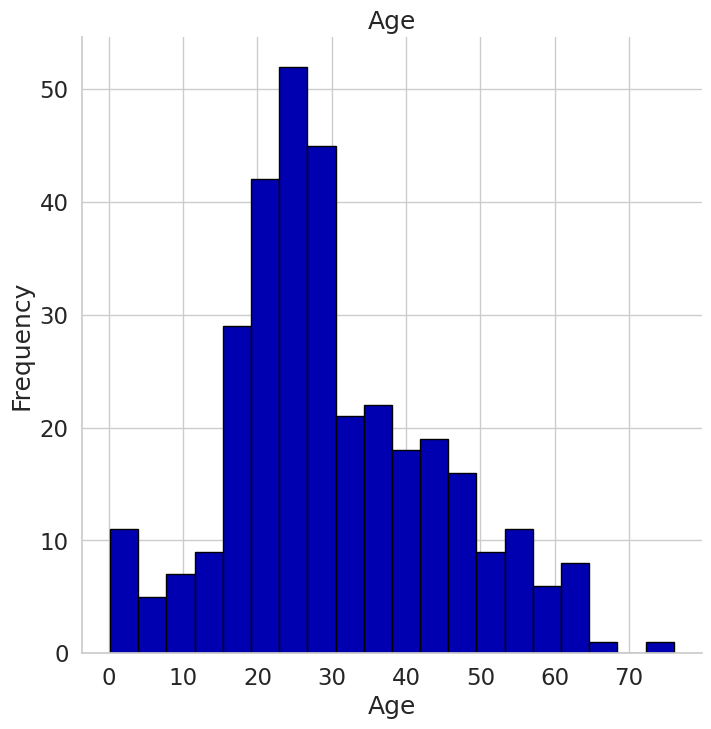

In [11]:
# Plot histogram for Age column
df['Age'].plot(kind='hist', bins=20, title='Age', edgecolor='black')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

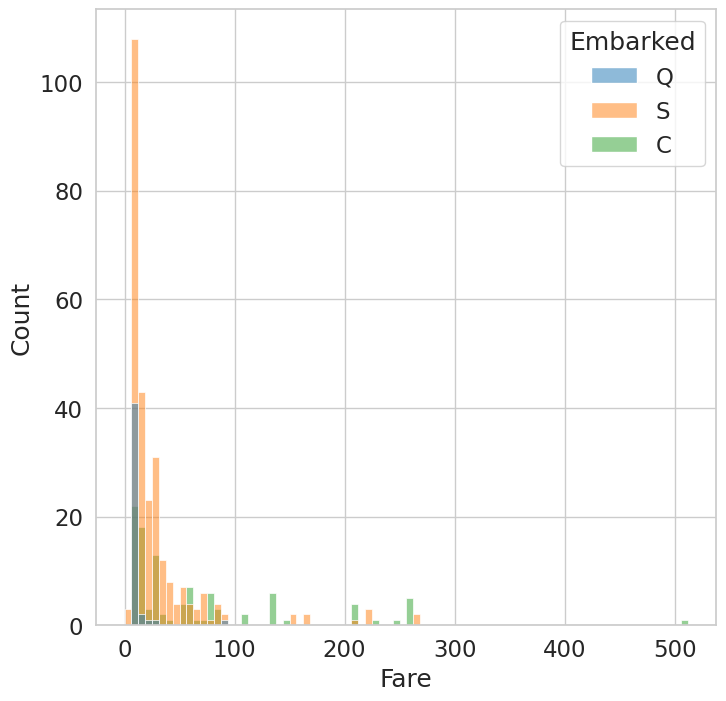

In [12]:
# Plot of Fare distribution
sns.histplot(data=df, x="Fare", hue="Embarked",palette="tab10");

In [13]:
# Aggregate statistics for Fare and Age Columns
df.agg(
    {
        "Fare": ["min", "max", "median", "mean","skew",'std'],
        "Age": ["min", "max", "median", "mean","skew",'std'],
    }
)

,Fare,Age
min,0.000000,0.170000
max,512.329200,76.000000
median,14.454200,27.000000
mean,35.627188,30.272590
skew,3.687213,0.457361
std,55.907576,14.181209


In [14]:
# Copy of dataset
dftitanic=df.copy()

## DATA PREPARATIION

In [15]:
# Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [16]:
# Count the number of unique values in categorical column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

,0
Name,418
Sex,2
Ticket,363
Cabin,76
Embarked,3


Count and Percentage Plot

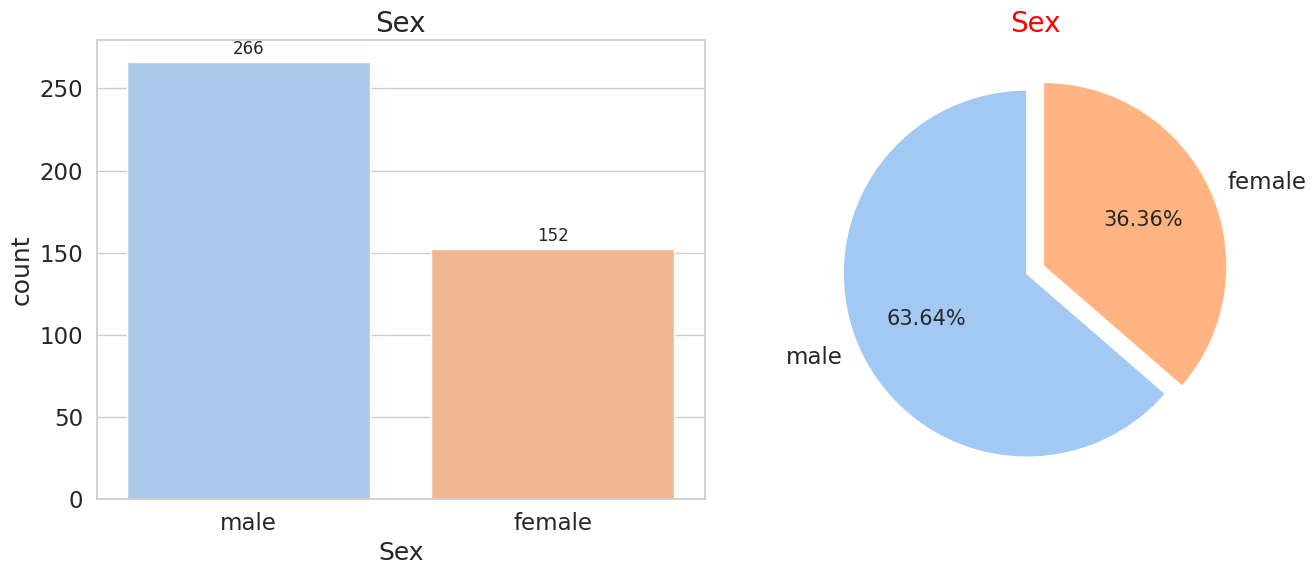

In [17]:
# Create chart for Sex distribution
soft_colors = sns.color_palette("pastel")

plt.figure(figsize=(14,6))

# Bar Chart
ax1 = plt.subplot(1,2,1)
bars = sns.countplot(x='Sex', data=df, palette=soft_colors, ax=ax1)
plt.title("Sex", fontsize=20)

# Label
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=12
    )

# Pie Chart
ax2 = plt.subplot(1,2,2)
sex_counts = df['Sex'].value_counts()
ax2 = sex_counts.plot.pie(
    explode=[0.05] * len(sex_counts),
    autopct='%1.2f%%',
    shadow=False,
    startangle=90,
    colors=soft_colors,
    labels=sex_counts.index
)
ax2.set_ylabel('')
ax2.set_title("Sex", fontsize=20, color='Red')

plt.tight_layout()
plt.show()

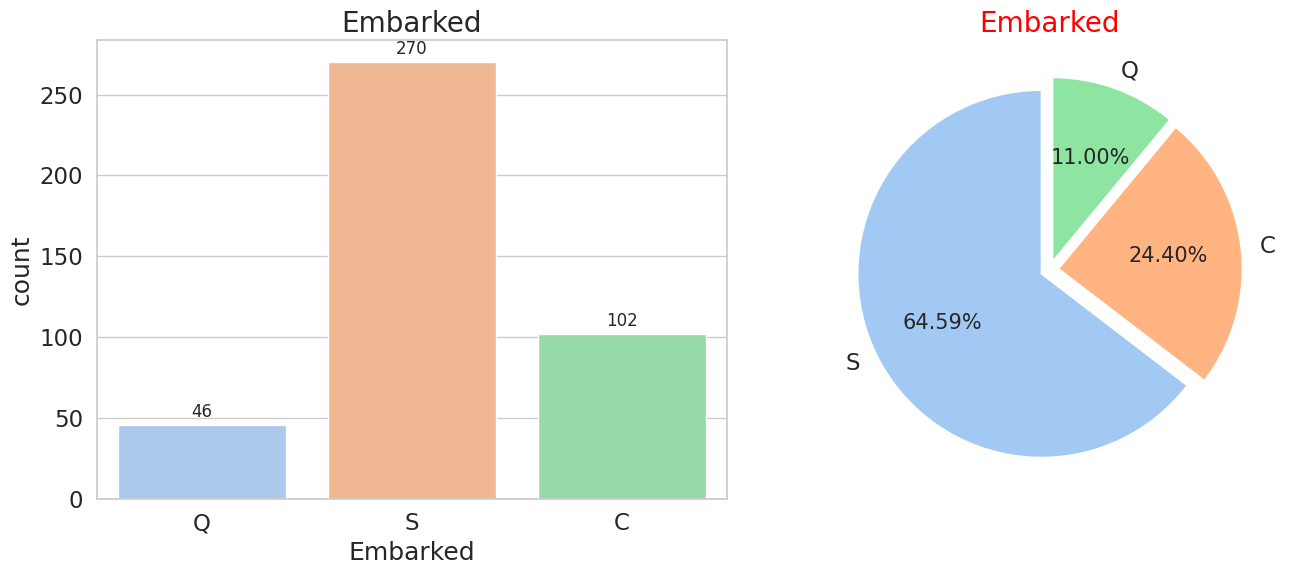

In [18]:
# Create chart for Embarked distribution
soft_colors = sns.color_palette("pastel")

plt.figure(figsize=(14,6))

# Bar Chart
ax1 = plt.subplot(1,2,1)
bars = sns.countplot(x='Embarked', data=df, palette=soft_colors, ax=ax1)
plt.title("Embarked", fontsize=20)

# Label
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=12
    )

# Pie Chart
ax2 = plt.subplot(1,2,2)
sex_counts = df['Embarked'].value_counts()
ax2 = sex_counts.plot.pie(
    explode=[0.05] * len(sex_counts),
    autopct='%1.2f%%',
    shadow=False,
    startangle=90,
    colors=soft_colors,
    labels=sex_counts.index
)
ax2.set_ylabel('')
ax2.set_title("Embarked", fontsize=20, color='Red')

plt.tight_layout()
plt.show()

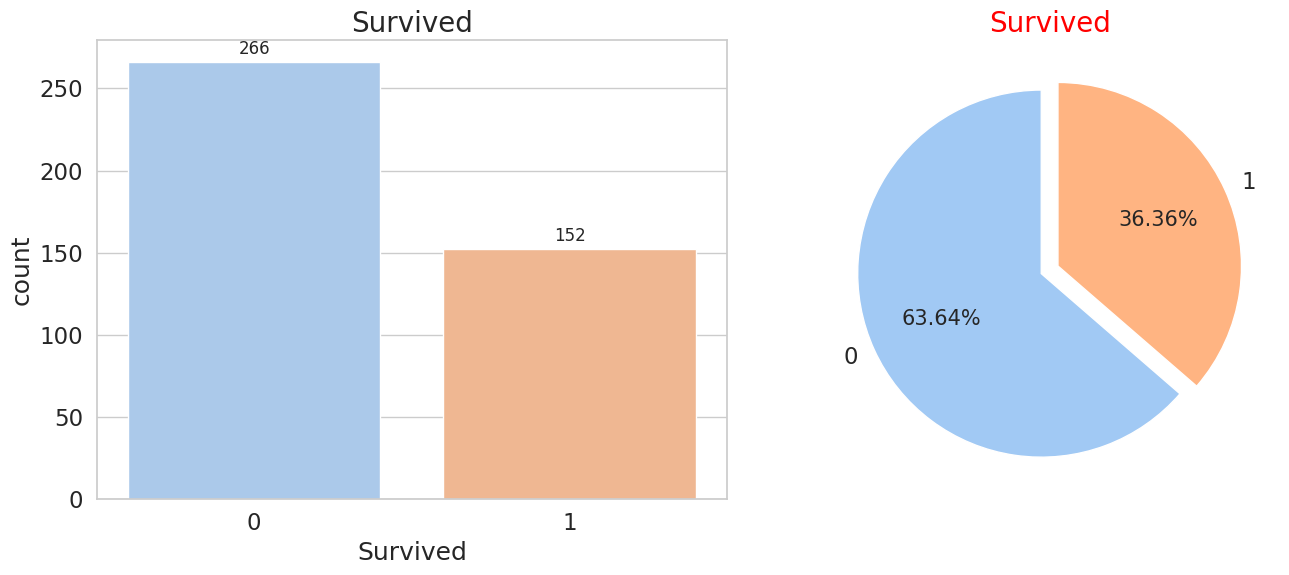

In [19]:
# Create chart for Survived distribution
soft_colors = sns.color_palette("pastel")

plt.figure(figsize=(14,6))

# Bar Chart
ax1 = plt.subplot(1,2,1)
bars = sns.countplot(x='Survived', data=df, palette=soft_colors, ax=ax1)
plt.title("Survived", fontsize=20)

# Label
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=12
    )

# Pie Chart
ax2 = plt.subplot(1,2,2)
sex_counts = df['Survived'].value_counts()
ax2 = sex_counts.plot.pie(
    explode=[0.05] * len(sex_counts),
    autopct='%1.2f%%',
    shadow=False,
    startangle=90,
    colors=soft_colors,
    labels=sex_counts.index
)
ax2.set_ylabel('')
ax2.set_title("Survived", fontsize=20, color='Red')

plt.tight_layout()
plt.show()

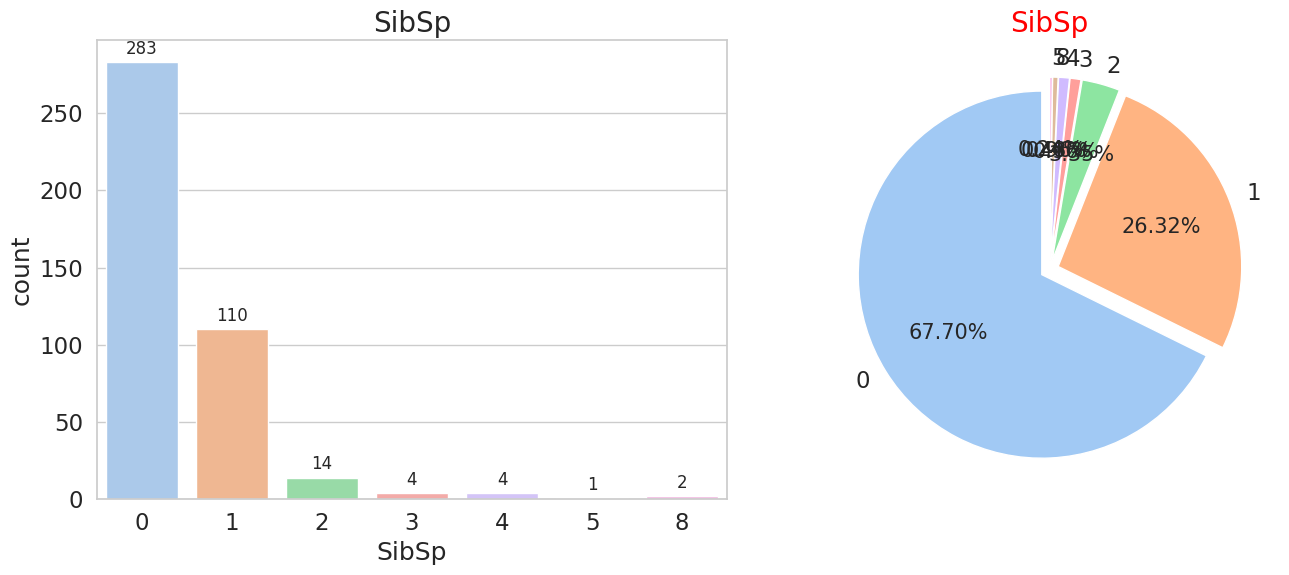

In [20]:
# Create chart for SibSp distribution
soft_colors = sns.color_palette("pastel")

plt.figure(figsize=(14,6))

# Bar Chart
ax1 = plt.subplot(1,2,1)
bars = sns.countplot(x='SibSp', data=df, palette=soft_colors, ax=ax1)
plt.title("SibSp", fontsize=20)

# Label
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=12
    )

# Pie Chart
ax2 = plt.subplot(1,2,2)
sex_counts = df['SibSp'].value_counts()
ax2 = sex_counts.plot.pie(
    explode=[0.05] * len(sex_counts),
    autopct='%1.2f%%',
    shadow=False,
    startangle=90,
    colors=soft_colors,
    labels=sex_counts.index
)
ax2.set_ylabel('')
ax2.set_title("SibSp", fontsize=20, color='Red')

plt.tight_layout()
plt.show()

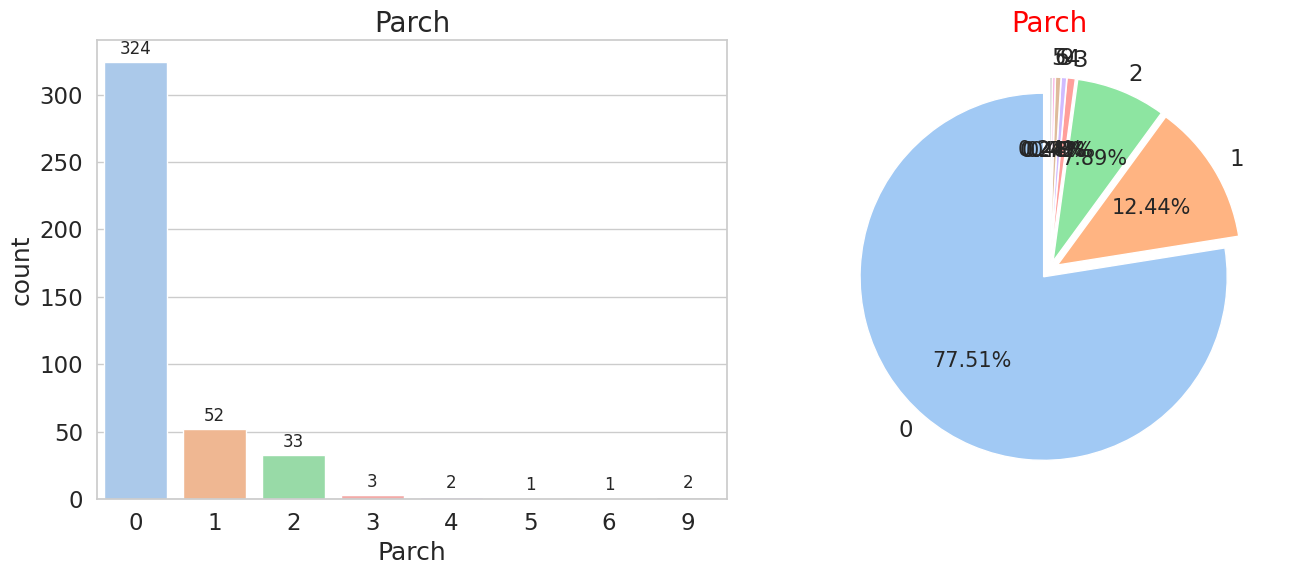

In [21]:
# Create chart for Parch distribution
soft_colors = sns.color_palette("pastel")

plt.figure(figsize=(14,6))

# Bar Chart
ax1 = plt.subplot(1,2,1)
bars = sns.countplot(x='Parch', data=df, palette=soft_colors, ax=ax1)
plt.title("Parch", fontsize=20)

# Label
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{int(height)}',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),
        textcoords="offset points",
        ha='center', va='bottom', fontsize=12
    )

# Pie Chart
ax2 = plt.subplot(1,2,2)
sex_counts = df['Parch'].value_counts()
ax2 = sex_counts.plot.pie(
    explode=[0.05] * len(sex_counts),
    autopct='%1.2f%%',
    shadow=False,
    startangle=90,
    colors=soft_colors,
    labels=sex_counts.index
)
ax2.set_ylabel('')
ax2.set_title("Parch", fontsize=20, color='Red')

plt.tight_layout()
plt.show()

### Correlation Matrix

In [22]:
# Calculate and sort correlations with 'Survived'
numeric_df = df.select_dtypes(include='number')
pd.DataFrame(abs(numeric_df.corr()['Survived'])).sort_values(by='Survived', ascending=False)


,Survived
Survived,1.000000
Fare,0.191514
Parch,0.159120
Pclass,0.108615
SibSp,0.099943
PassengerId,0.023245
Age,0.000013


In [23]:
# Display correlation matrix
numeric_df.corr().style\
    .background_gradient(cmap='coolwarm')\
    .format(precision=3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.023,-0.027,-0.034,0.004,0.043,0.008
Survived,-0.023,1.000,-0.109,-0.000,0.100,0.159,0.192
Pclass,-0.027,-0.109,1.000,-0.492,0.001,0.019,-0.577
Age,-0.034,-0.000,-0.492,1.000,-0.092,-0.061,0.338
SibSp,0.004,0.100,0.001,-0.092,1.000,0.307,0.172
Parch,0.043,0.159,0.019,-0.061,0.307,1.000,0.230
Fare,0.008,0.192,-0.577,0.338,0.172,0.230,1.000


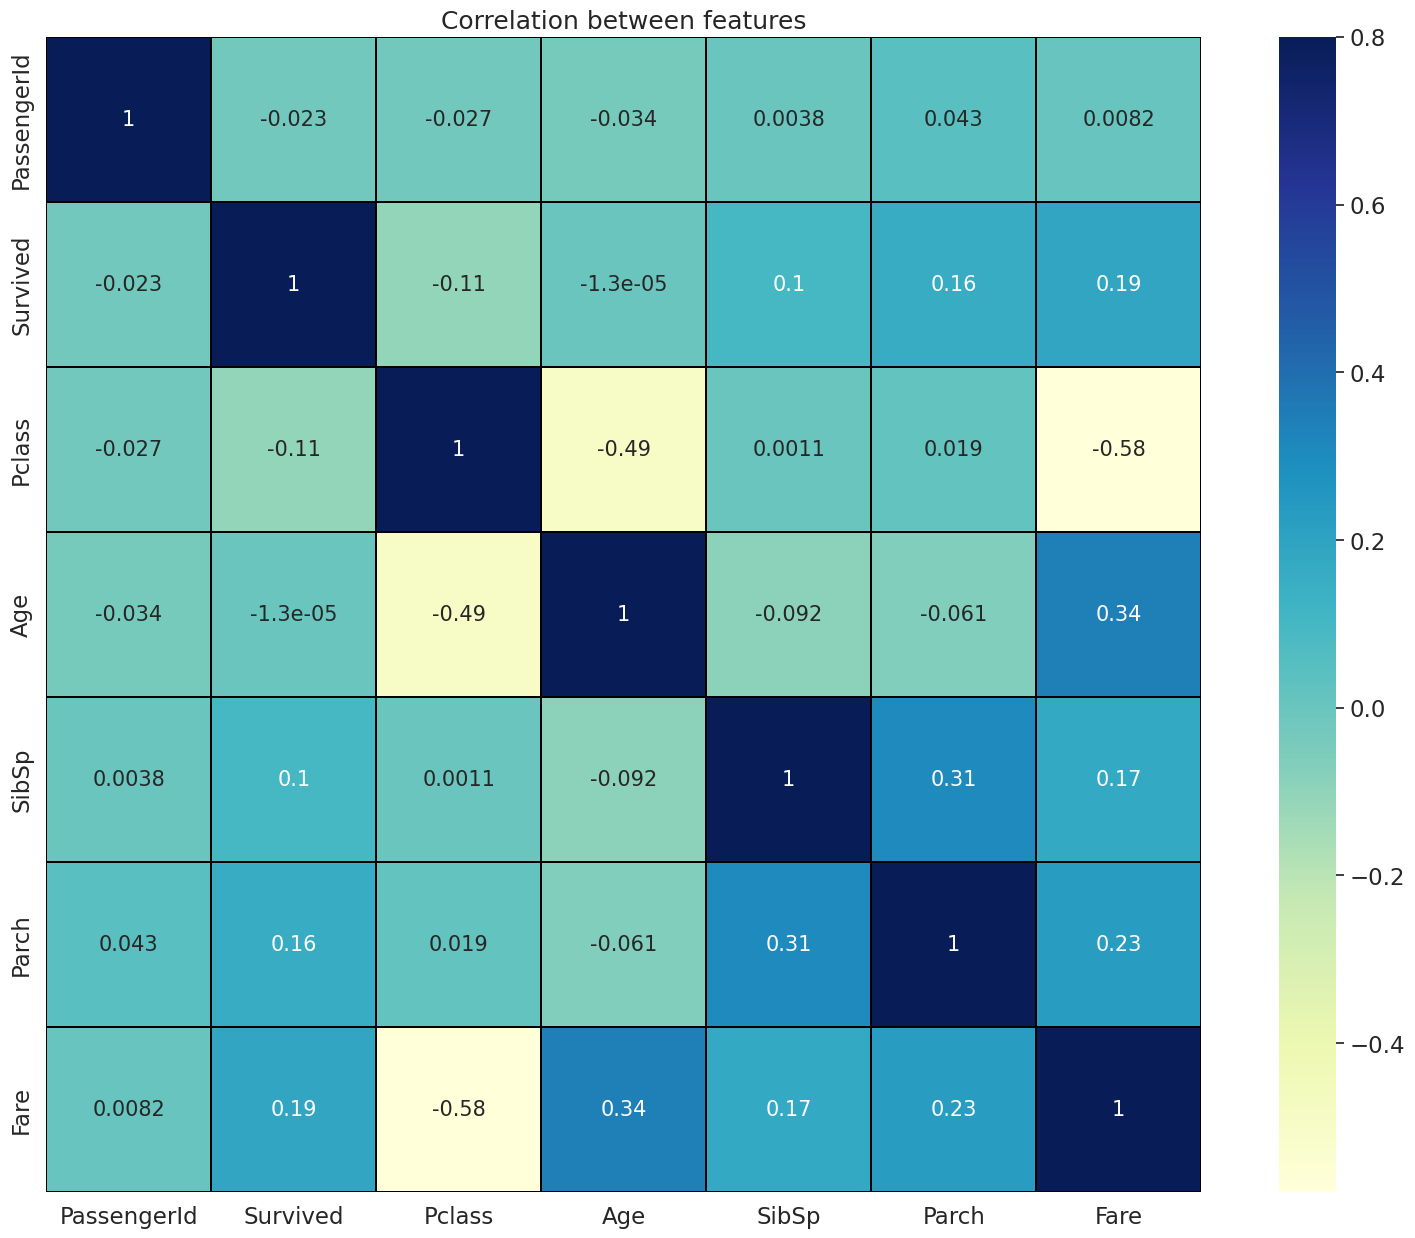

In [24]:
# Heatmap of feature correlations
corr=numeric_df.corr()#["Survived"]
plt.figure(figsize=(20, 15))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features')
plt.show()

In [25]:
# correlation heatmap of higly correlated features with SalePrice
hig_corr = numeric_df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Pclass', 'Age', 'Fare'], dtype='object')

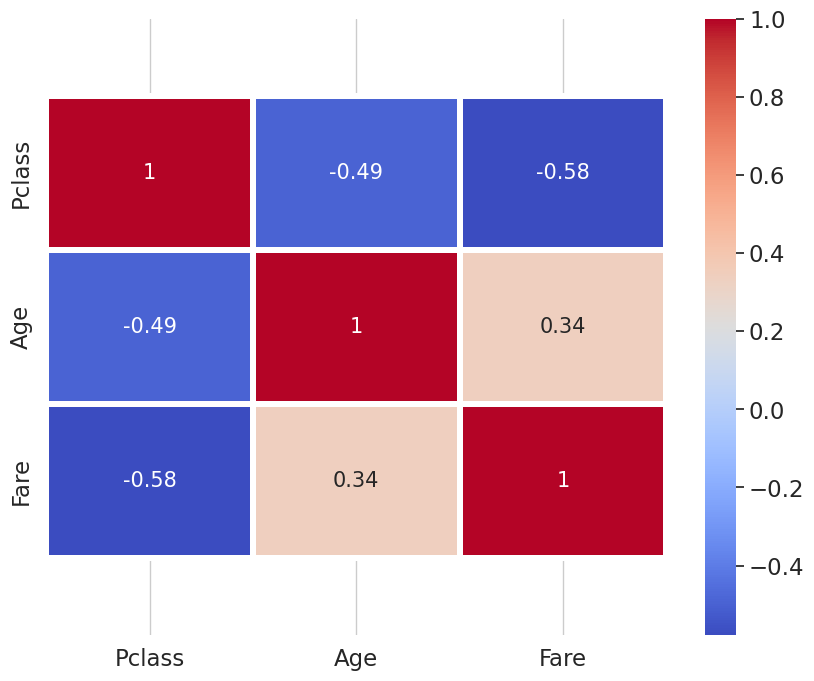

In [26]:
# Plot heatmap for high correlation features
plt.figure(figsize=(10,8))
ax = sns.heatmap(df[hig_corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## DATA PREPARATION

### Missing Value

In [27]:
# Percentage of missing values in each column
df.isnull().mean().sort_values(ascending=False)*100

,0
Cabin,78.229665
Age,20.574163
Fare,0.239234
PassengerId,0.000000
Name,0.000000
Pclass,0.000000
Survived,0.000000
Sex,0.000000
Parch,0.000000
SibSp,0.000000


In [28]:
# Function to calculate missing values
def missing_value (df):
    missing_Number = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) !=0]
    missing_percent=round((df.isnull().sum()/df.isnull().count())*100,2)[round((df.isnull().sum()/df.isnull().count())*100,2) !=0]
    missing = pd.concat([missing_Number,missing_percent],axis=1,keys=['Missing Number','Missing Percentage'])
    return missing

In [29]:
# Display the missing values
missing_data = missing_value(df)
print(missing_data)

       Missing Number  Missing Percentage
Cabin             327               78.23
Age                86               20.57
Fare                1                0.24


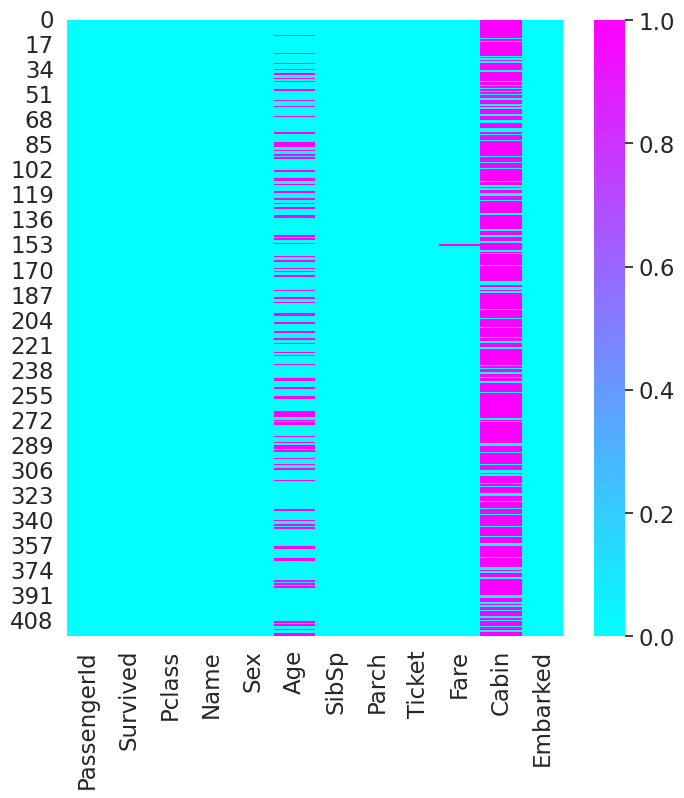

In [30]:
# Plot heatmap to visualize missing values in the DataFrame
sns.heatmap(df.isnull(),cmap='cool');

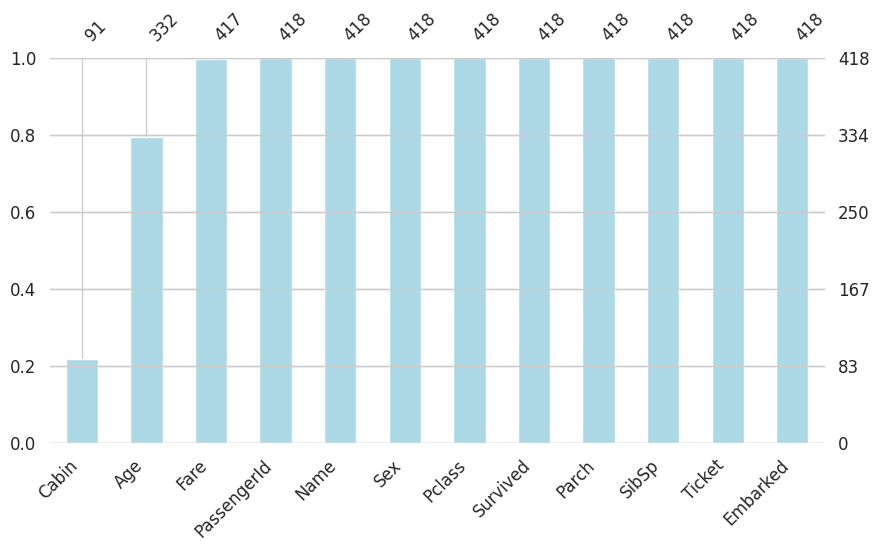

In [31]:
# Visualize missing data using a bar chart with missingno
import missingno
missingno.bar(df, color="lightblue", sort="ascending", figsize=(10,5), fontsize=12);

### Handling Missing Value

In [32]:
# Fill missing values in 'Age' column with the mean value
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [33]:
# Filter rows where 'Fare' column has missing values
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [34]:
# Fill missing values in 'Fare' column using backward fill method
df['Fare'] = df['Fare'].fillna(method='bfill')

In [35]:
# Drop the 'Cabin' column from the DataFrame
df = df.drop(['Cabin'],axis=1)

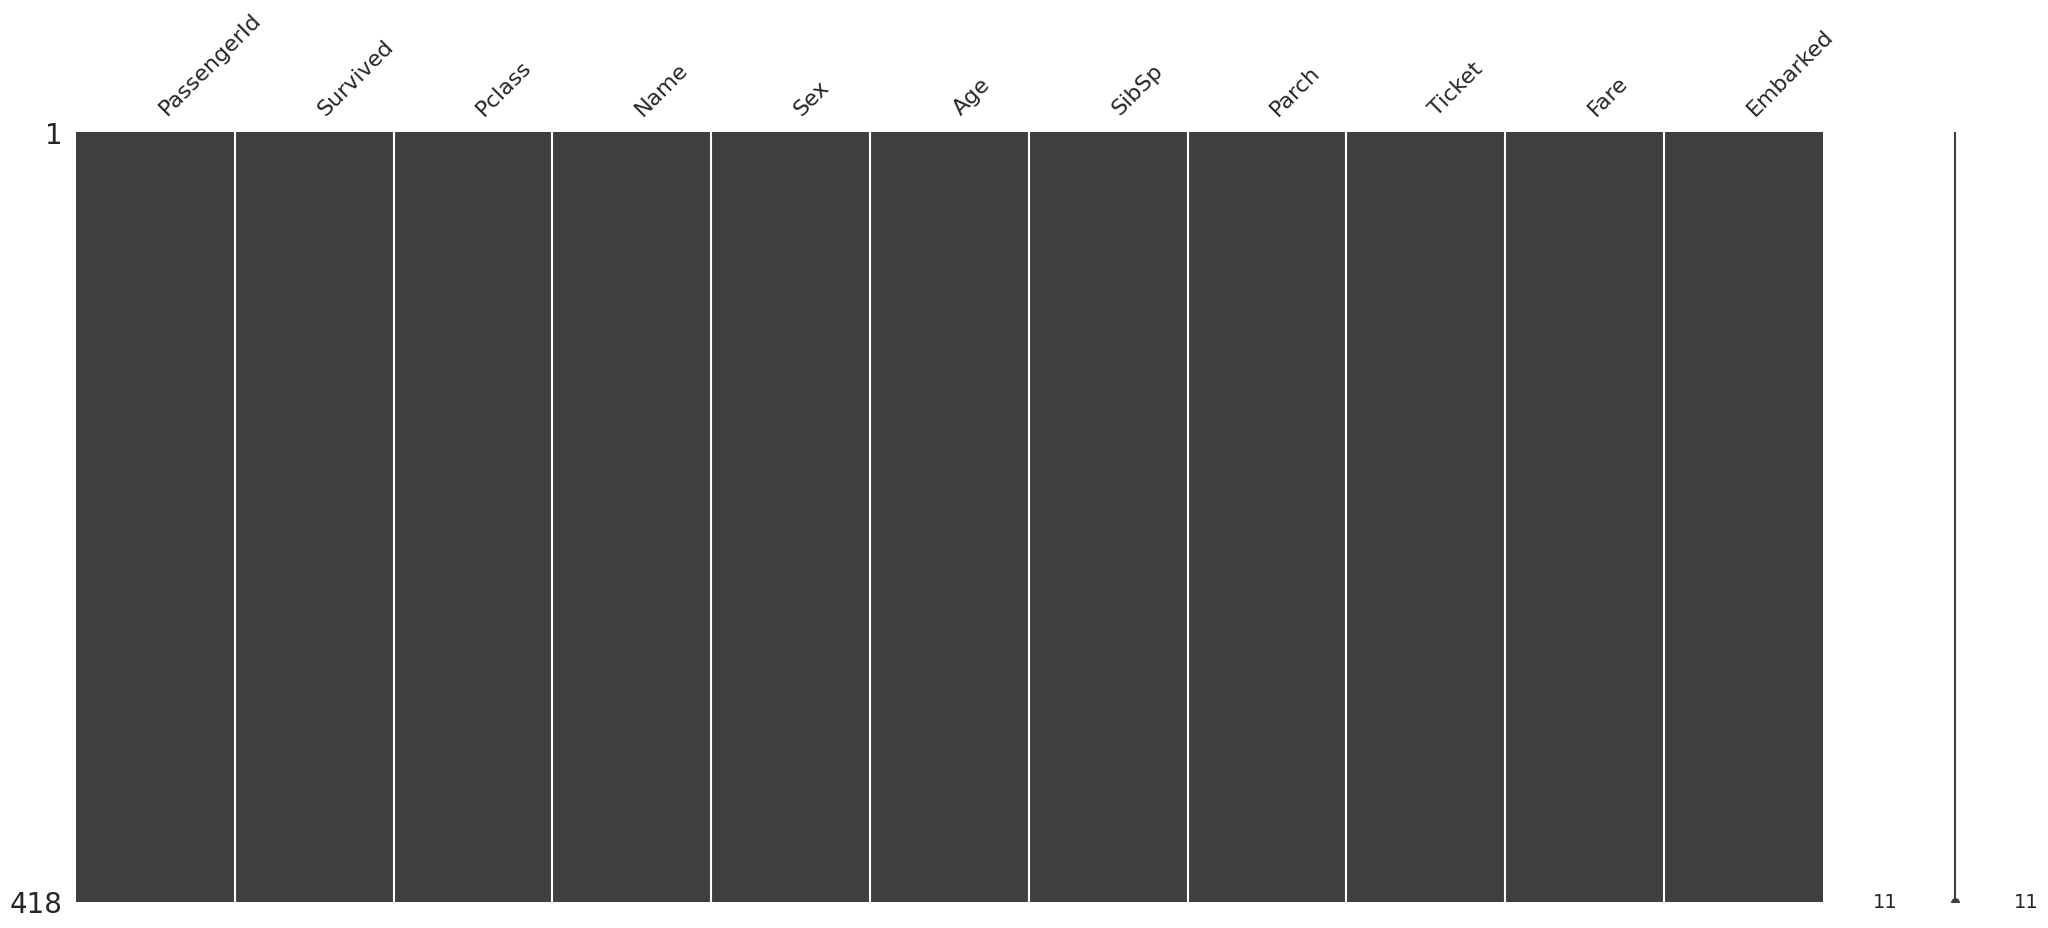

In [36]:
# Visualize missing data pattern using missingno matrix
import missingno as msno
msno.matrix(df)
plt.show()

All the missing value is filled/removed

### Outliers

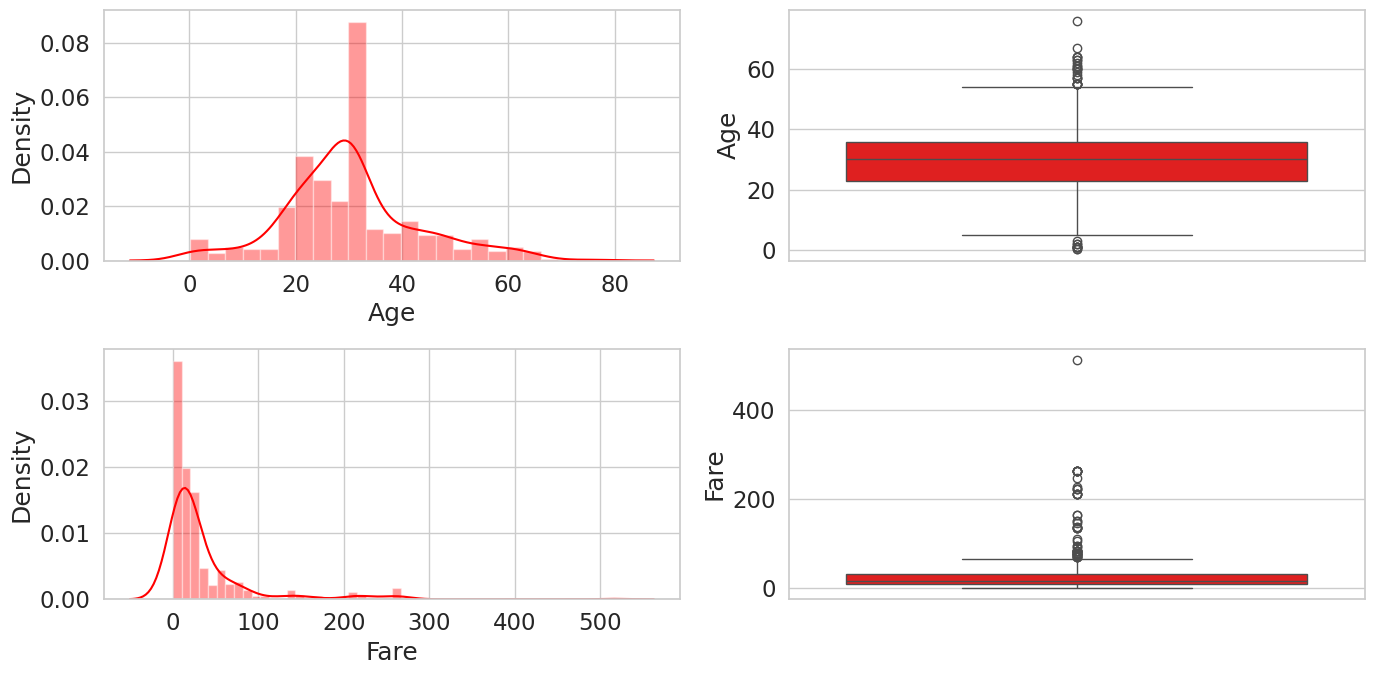

In [37]:
# Plot distribution and boxplot for Age and Fare
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.distplot(df['Age'],color='Red')
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='Red')

plt.subplot(2,2,3)
sns.distplot(df['Fare'],color='Red')
plt.subplot(2,2,4)
sns.boxplot(df['Fare'],color='Red')

plt.tight_layout()
plt.show()

In [38]:
# Calculate and sort IQR for numeric columns
numeric_df = df.select_dtypes(include='number')

Q1 = numeric_df.quantile(0.02)
Q3 = numeric_df.quantile(0.98)
IQR = Q3 - Q1

IQR.sort_values(ascending=False)

,0
PassengerId,400.320000
Fare,233.705228
Age,59.000000
SibSp,3.000000
Parch,2.660000
Pclass,2.000000
Survived,1.000000


In [39]:
# Remove outliers from DataFrame based on IQR method
titanic = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

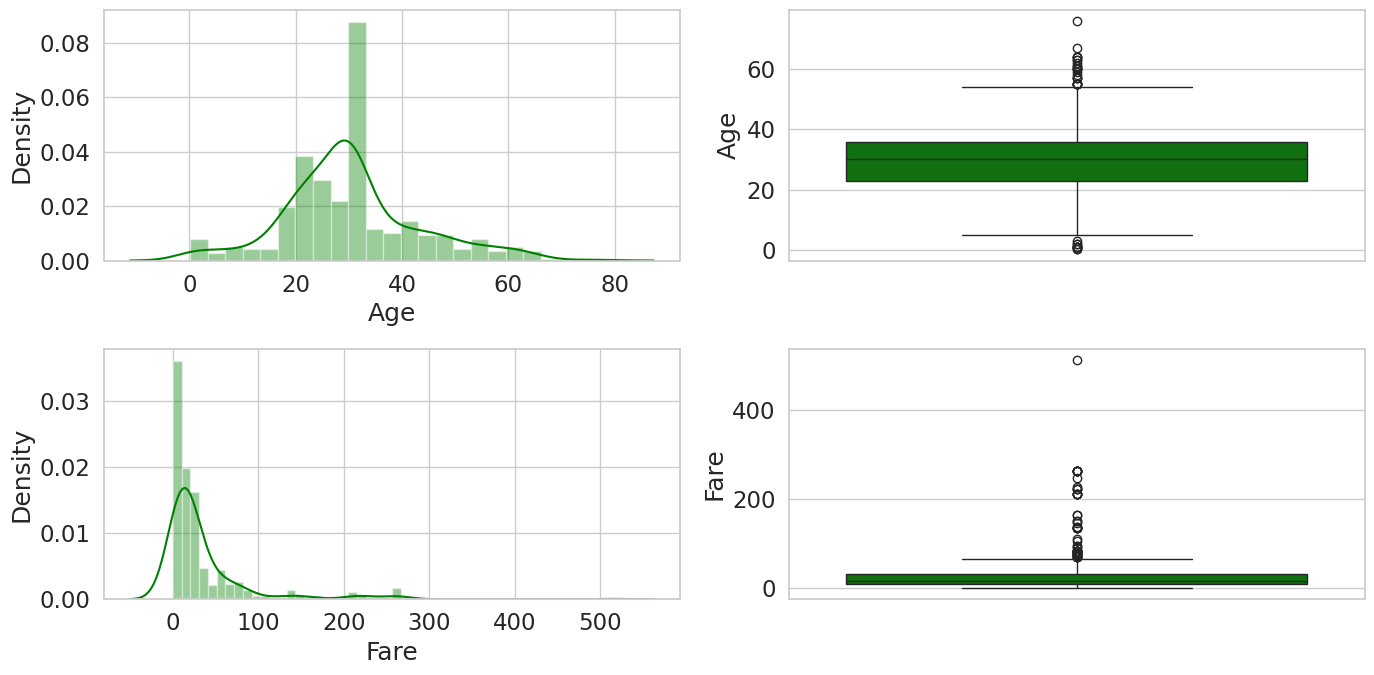

In [40]:
# Visualize Age and Fare with distribution and boxplot
plt.figure(figsize=(14,7))

plt.subplot(2,2,1)
sns.distplot(df['Age'],color='Green')
plt.subplot(2,2,2)
sns.boxplot(df['Age'],color='Green')

plt.subplot(2,2,3)
sns.distplot(df['Fare'],color='Green')
plt.subplot(2,2,4)
sns.boxplot(df['Fare'],color='Green')

plt.tight_layout()
plt.show()

### Visualization

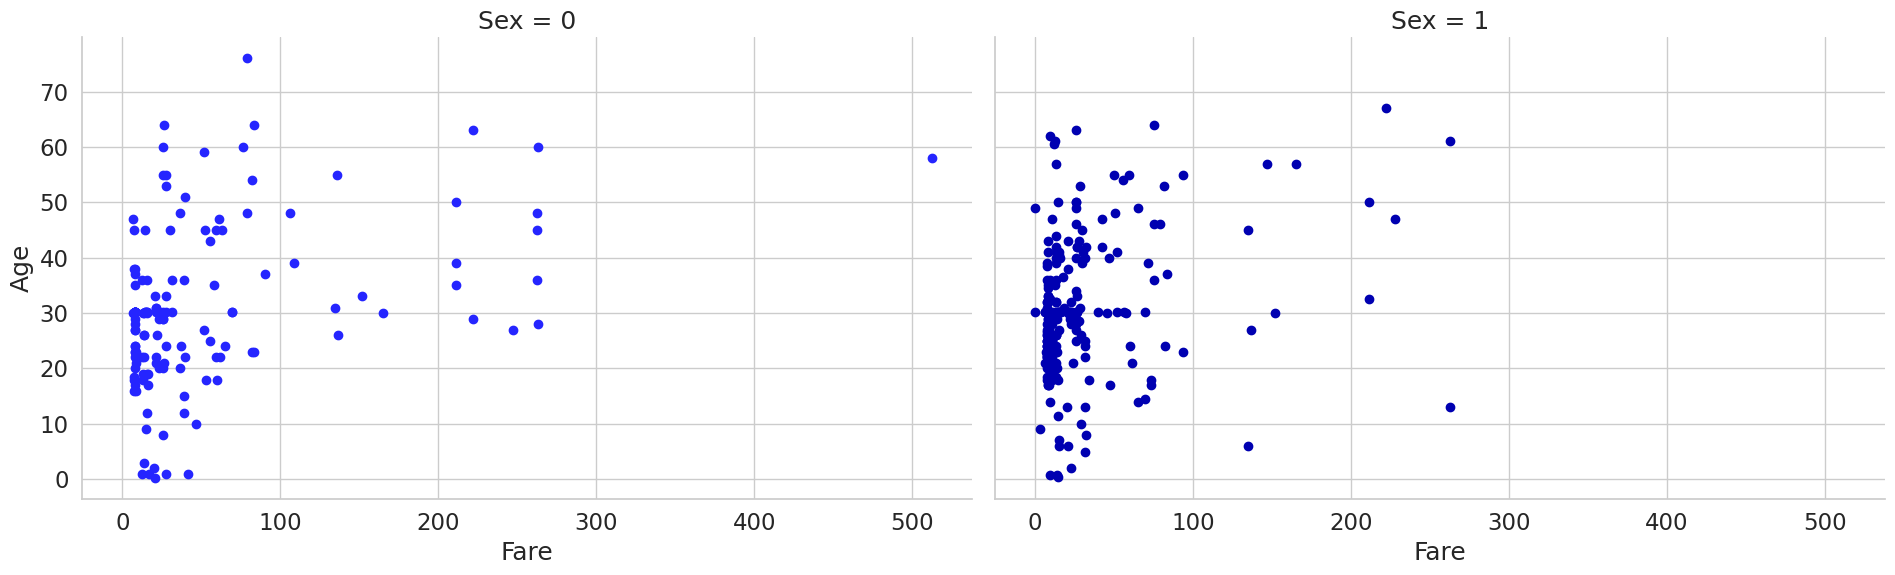

In [59]:
# Scatter plot of Fare vs Age
df_fig = sns.FacetGrid(df, col='Sex', hue='Survived',height=6,aspect=1.6)
df_fig.map(plt.scatter,'Fare','Age' )
plt.show()

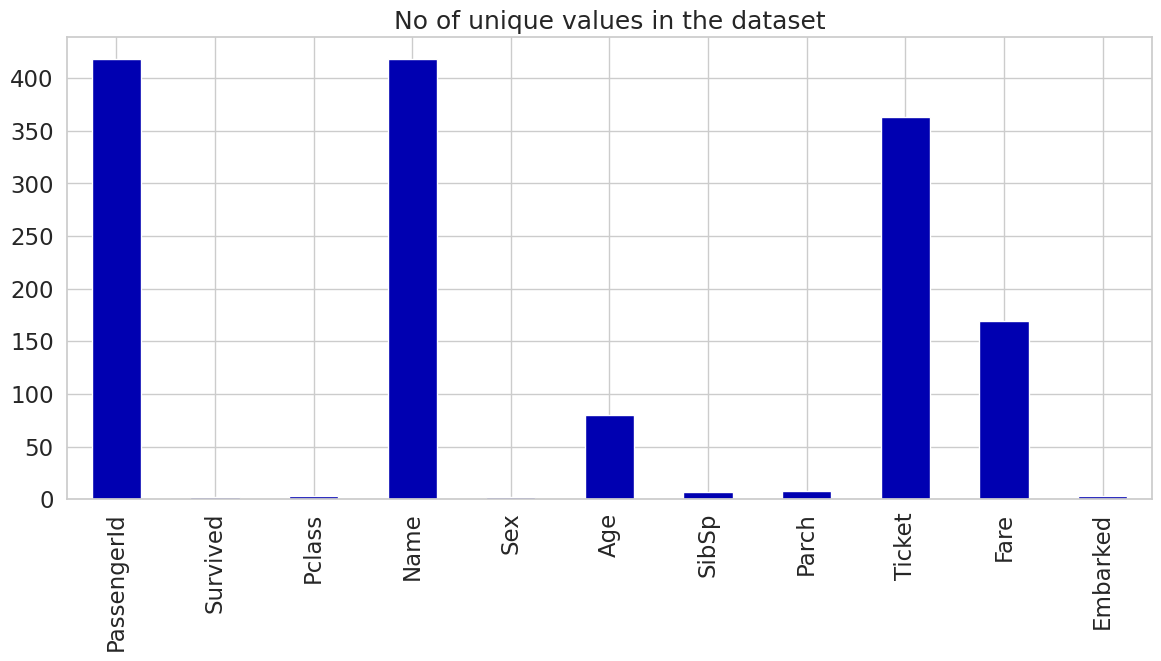

In [42]:
# Bar plot showing the number of unique values per column
plt.figure(figsize=(14,6))

df.nunique().plot(kind='bar')
plt.title('No of unique values in the dataset')
plt.show()

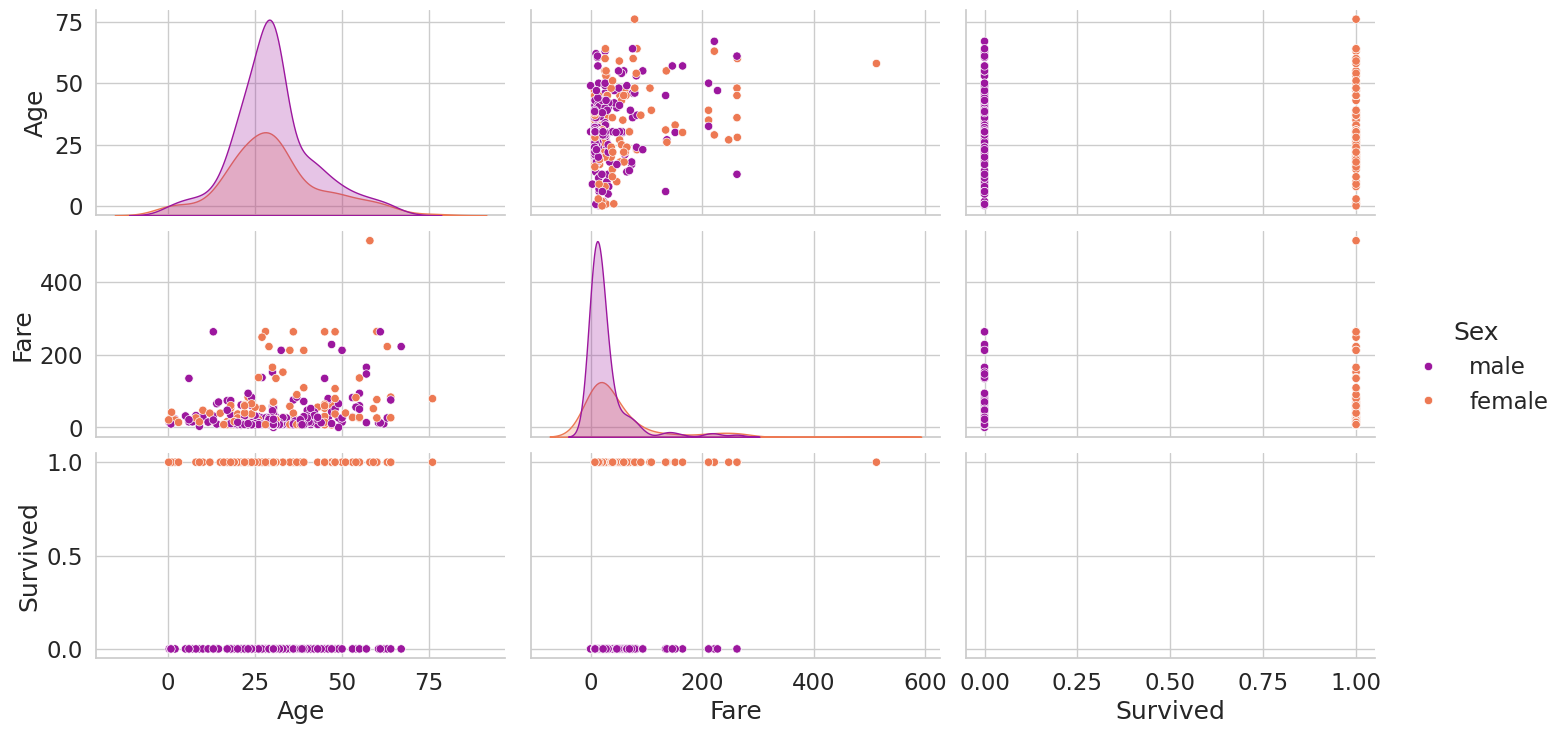

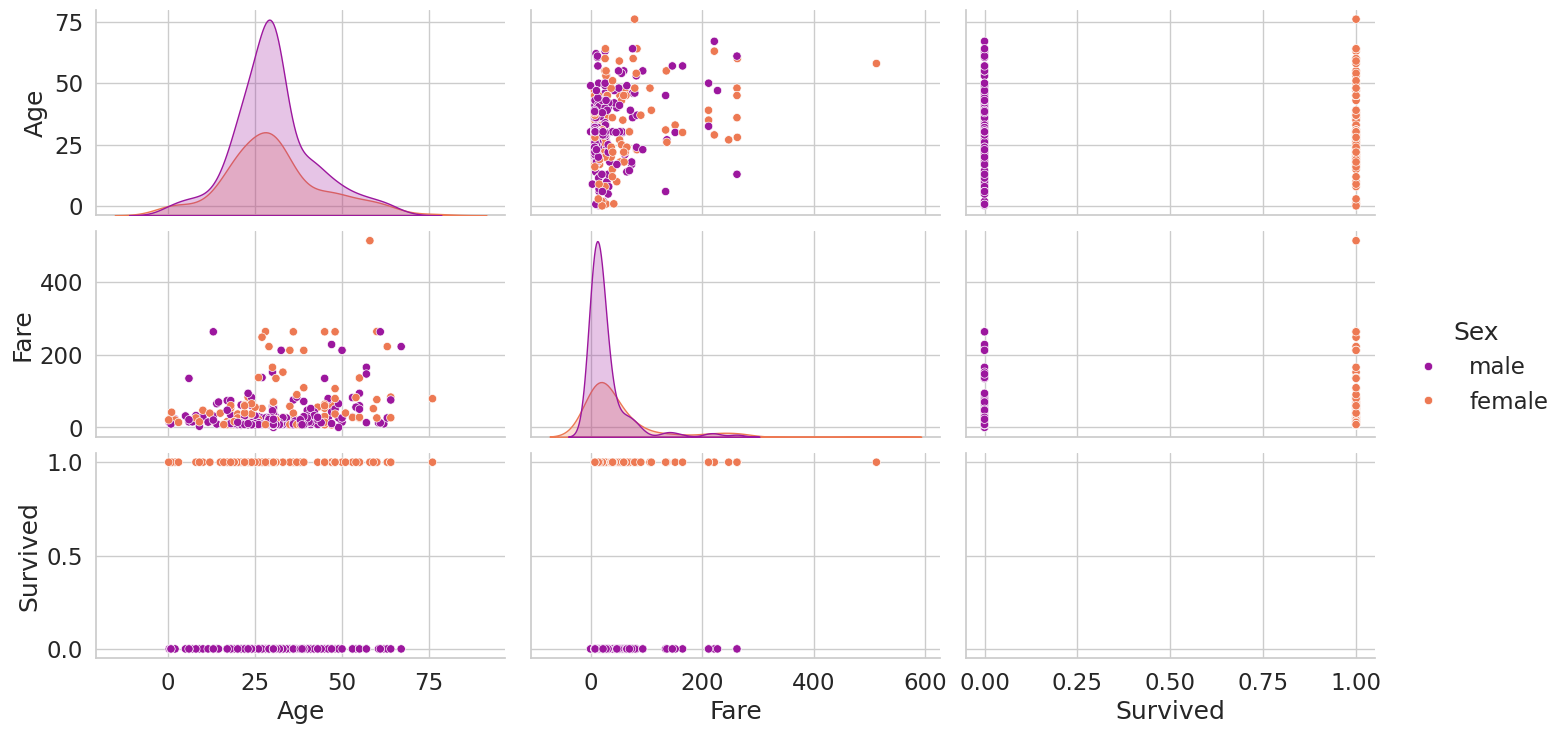

In [43]:
# Pairplot to explore relationships between Age, Fare, and Survived
sns.pairplot(df, vars=['Age', 'Fare', 'Survived'], hue='Sex', palette='plasma', aspect=1.9)
sns.pairplot(df,vars=['Age','Fare','Survived'],hue='Sex',palette='plasma',aspect=1.9);

In [44]:
# Identify and print numerical and categorical columns
numerical = df.select_dtypes(include=['number']).columns
categorical = df.select_dtypes(include=['object']).columns

print('Numerical  :',numerical)
print("Categorical:",categorical)

Numerical  : Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Categorical: Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [45]:
# Print value counts
for col in df[['Sex', 'Embarked','Survived','Pclass','SibSp','Parch']]:
    print(df[col].value_counts())
    print("-----"*7)

Sex
male      266
female    152
Name: count, dtype: int64
-----------------------------------
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64
-----------------------------------
Survived
0    266
1    152
Name: count, dtype: int64
-----------------------------------
Pclass
3    218
1    107
2     93
Name: count, dtype: int64
-----------------------------------
SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64
-----------------------------------
Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64
-----------------------------------


### Converted Column

In [46]:
# Drop Name and Ticket columns from the DataFrame
df = df.drop (['Name', 'Ticket'], axis=1)

In [47]:
# Display the first 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [48]:
# Encode Sex and Embarked columns into numeric values
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
df['Embarked'] = df['Embarked'].map({'S': 0, 'Q': 1, 'C': 2}).astype(int)

In [50]:
# Display the first 5 rows of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,0
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,0
4,896,1,3,0,22.0,1,1,12.2875,0


In [51]:
# Print data types of Sex and Embarked columns
print(df[['Sex', 'Embarked']].dtypes)

Sex         int64
Embarked    int64
dtype: object


### Train Test Split

In [52]:
# Split dataset into features (X) and target (y)
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [53]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

### Scaling Data

In [67]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [68]:
# Display the first 5 rows of the scaled training and testing data
display(X_train.head())
display(X_test.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.062350,0.0,0.0,0.326650,0.000,0.111111,0.120975,1.0
1,0.270983,1.0,0.0,0.274278,0.000,0.000000,0.014216,0.5
2,0.964029,0.0,0.0,0.326650,0.000,0.111111,0.115941,1.0
3,0.335731,1.0,0.0,0.147090,0.625,0.222222,0.091543,0.0
4,0.508393,0.5,1.0,0.251833,0.000,0.000000,0.143462,0.0


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.131894,1.0,1.0,0.147090,0.500,0.111111,0.056848,0.5
1,0.573141,0.0,0.0,0.715697,0.125,0.000000,0.207728,1.0
2,0.537170,0.0,0.0,0.790513,0.000,0.000000,0.053571,1.0
3,0.901679,1.0,0.0,0.326650,0.250,0.000000,0.016908,0.0
4,0.422062,0.5,0.0,0.296723,0.000,0.000000,0.071731,0.0


## MODEL IMPLEMENTATION

In [69]:
# Train a Logistic Regression model and evaluate its accuracy
lr = LogisticRegression(max_iter=1000, random_state=21)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


## EVALUATION

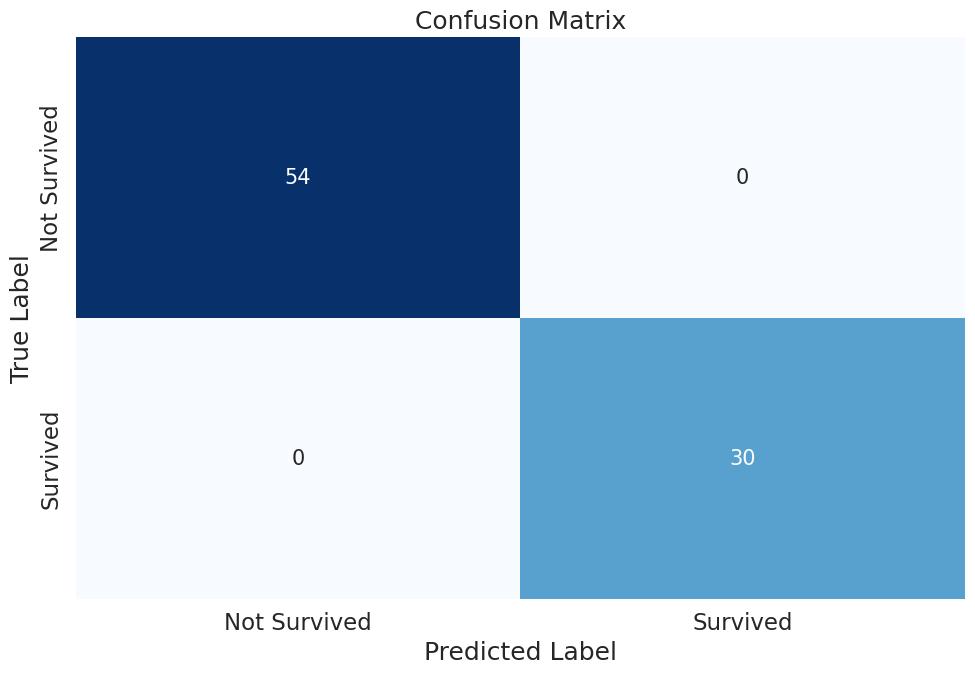

In [70]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [71]:
# Print the classification report to evaluate model performance
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        30

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



##CONCLUSION

The Logistic Regression model that has been created demonstrates excellent performance based on the displayed confusion matrix. The model is able to classify the entire test data with 100% accuracy, where all 54 passengers who did not survive and all 30 passengers who survived were correctly predicted without any errors. This is reflected in the precision, recall, and F1-score values, all of which reached perfect scores of 1.0.
